Este material é de uso exclusivo dos estudantes matriculados nas disciplina MAC110 / MAC115 / MAC 2166 do IME-USP. O material ainda está em desenvolvimento. Qualquer reprodução, distribuição ou compartilhamento, integral ou parcial, fora do âmbito da disciplina, sem autorização expressa dos autores, é proibido. Todos os direitos reservados.

Por gentileza, nos ajude a melhorar o livro! Isso ajudará aos estudantes atuais e futuros. Encontrou erros? Achou partes confusas? Está faltando algo? Como podemos melhorar? Basta preencher o formulário aqui: https://forms.gle/qVw5UGF2gWBAtnk49

# Versão simplificada (prova)

102
120
95


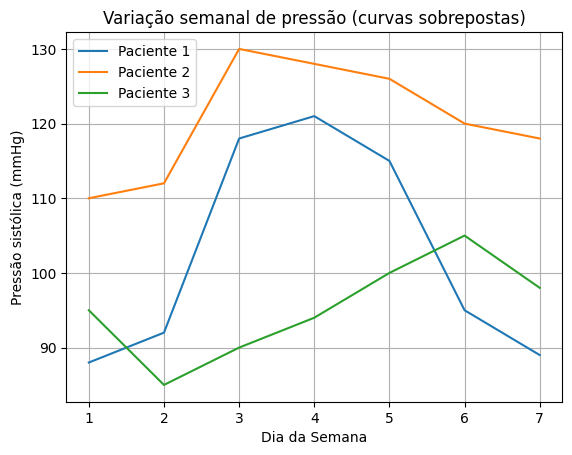

In [9]:
RAW_URL = "https://raw.githubusercontent.com/rmcesarjr/iccd/main/data/pressao_pacientes.csv"


def carrega_dados():
    df = pd.read_csv(RAW_URL)
    ids = list(df["ID_paciente"])
    dias = list(df["Dia"])
    pressoes = list(df["Pressao"])
    return ids, dias, pressoes

def max_id(ids):
    m = -1
    for x in ids:
        if x > m:
            m = x
    return m

def serie_do_paciente(ids, dias, vals, pid):
    xs, ys = [], []
    for j in range(len(ids)):
        if ids[j] == pid:
            xs.append(dias[j])
            ys.append(vals[j])
    return xs, ys

def estatisticas_paciente(y):
    soma = 0
    for v in y:
        soma += v
    media = soma // len(y)
    return media

def main():
    ids, dias, pressoes = carrega_dados()
    n = max_id(ids)
    plt.figure()
    for pid in range(1, n+1):
        xs, ys = serie_do_paciente(ids, dias, pressoes, pid)
        plt.plot(xs, ys, label=f"Paciente {pid}")
        media = estatisticas_paciente(ys)
        print(media)

    plt.xlabel("Dia da Semana")
    plt.ylabel("Pressão sistólica (mmHg)")
    plt.title("Variação semanal de pressão (curvas sobrepostas)")
    plt.legend()
    plt.grid(True)
    plt.show()

main()

# Versão Completa

## Análise dos dados

### Versão inicial com listas

In [11]:
import matplotlib.pyplot as plt
import pandas as pd
import io
from google.colab import files
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
import matplotlib.cm as cm
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.lines import Line2D

RAW_URL = "https://raw.githubusercontent.com/rmcesarjr/iccd/main/data/dados_pressao_local.csv"
#RAW_URL = None  # util para ler do proprio hd local

def carrega_dados():
    if RAW_URL:
        df = pd.read_csv(RAW_URL)
    else:
        uploaded = files.upload()
        nome = next(iter(uploaded))
        df = pd.read_csv(io.BytesIO(uploaded[nome]))

    ids    = df["ID_paciente"].tolist()
    datas  = df["Data"].tolist()
    sist   = df["Sistolica"].tolist()
    dias   = df["Diastolica"].tolist()
    glic   = df["Glicemia"].tolist()
    grupos = df["Grupo"].tolist()

    return ids, datas, sist, dias, glic, grupos

def gindex(g):
    if g == "Medicamento": return 0
    if g == "Placebo":     return 1
    if g == "Nada":        return 2
    return -1

def tabela_sumaria_simplificada(ids, datas, sistolica, diastolica, glicemia, grupos):
    gnames = ["Medicamento", "Placebo", "Nada"]

    # Acumuladores (contagem e somas)
    n  = [0, 0, 0]
    sS = [0.0, 0.0, 0.0]  # soma Sistólica
    sD = [0.0, 0.0, 0.0]  # soma Diastólica
    sG = [0.0, 0.0, 0.0]  # soma Glicemia

    L = len(grupos)
    for i in range(L):
        gi = gindex(grupos[i])
        if gi < 0:
            continue
        n[gi]  += 1
        sS[gi] += float(sistolica[i])
        sD[gi] += float(diastolica[i])
        sG[gi] += float(glicemia[i])

    # Impressão
    print("Resumo (média e número de ocorrências por grupo):")
    for gi in range(3):
        if n[gi] == 0:
            continue
        meanS = sS[gi] / n[gi]
        meanD = sD[gi] / n[gi]
        meanG = sG[gi] / n[gi]
        print(f"- {gnames[gi]}: n={n[gi]} | "
              f"Sistólica={meanS:.1f}  Diastólica={meanD:.1f}  Glicemia={meanG:.1f}")


def main():
  #data_loader
  ids, datas, sist, dia, gli, grupos = carrega_dados()

  # analise inicial
  tabela_sumaria_simplificada(ids, datas, sist, dia, gli, grupos)

main()

Resumo (média e número de ocorrências por grupo):
- Medicamento: n=700 | Sistólica=121.4  Diastólica=78.2  Glicemia=99.3
- Placebo: n=700 | Sistólica=132.3  Diastólica=90.5  Glicemia=114.8
- Nada: n=700 | Sistólica=135.7  Diastólica=91.5  Glicemia=112.4


### Versão com dataframes

=== CONTROLE DE QUALIDADE (data) ===
Total de amostras: 2100
Removidas: 397  (18.90%)




Resumo estatístico por grupo (inclui #Pacientes distintos):


,#Pacientes,"(Sistolica, count)","(Sistolica, mean)","(Sistolica, min)","(Sistolica, max)","(Diastolica, count)","(Diastolica, mean)","(Diastolica, min)","(Diastolica, max)","(Glicemia, count)","(Glicemia, mean)","(Glicemia, min)","(Glicemia, max)"
Grupo,,,,,,,,,,,,,
Medicamento,100,700,121.4,-40,620,700,78.2,-20,440,700,99.3,-40,450
Nada,100,700,135.7,-40,620,700,91.6,-20,440,700,112.4,-40,450
Placebo,100,700,132.3,-40,620,700,90.5,-20,440,700,114.8,-40,450






Resumo estatístico por grupo (inclui #Pacientes distintos):


,#Pacientes,"(Sistolica, count)","(Sistolica, mean)","(Sistolica, min)","(Sistolica, max)","(Diastolica, count)","(Diastolica, mean)","(Diastolica, min)","(Diastolica, max)","(Glicemia, count)","(Glicemia, mean)","(Glicemia, min)","(Glicemia, max)"
Grupo,,,,,,,,,,,,,
Medicamento,100,561,115.1,98,130,561,75.2,61,92,561,90.2,74,106
Nada,100,566,125.2,109,140,566,84.9,70,101,566,109.5,94,124
Placebo,100,576,125.4,111,145,576,85.0,72,101,576,110.4,95,125


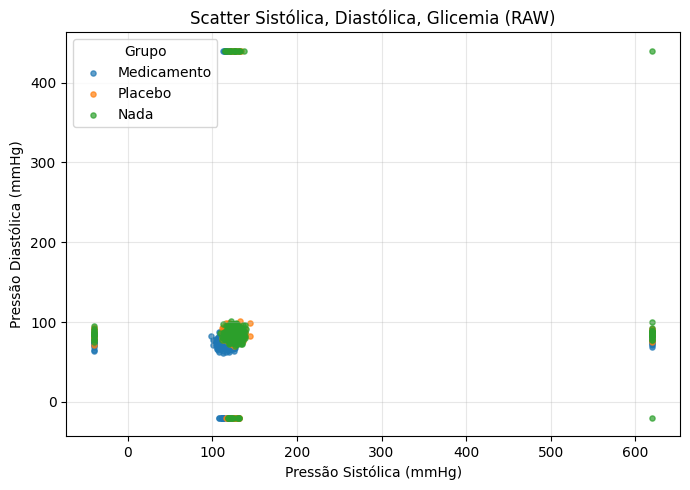

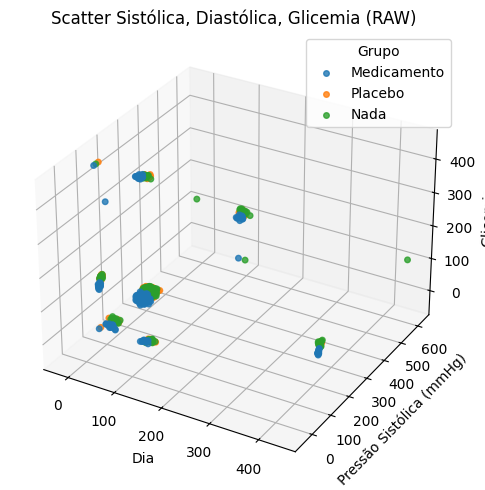

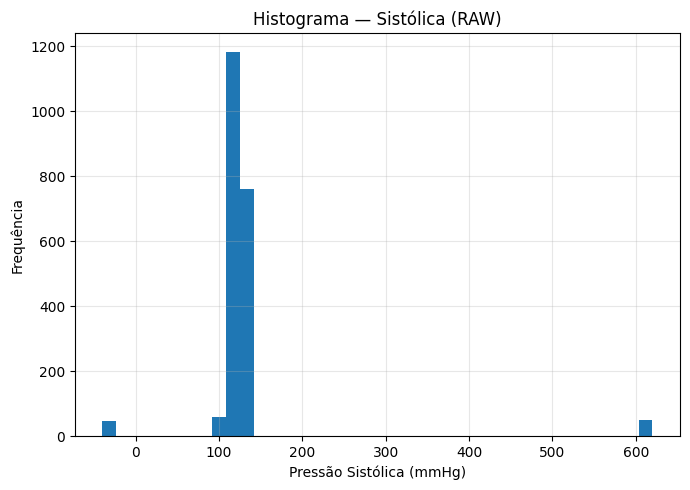

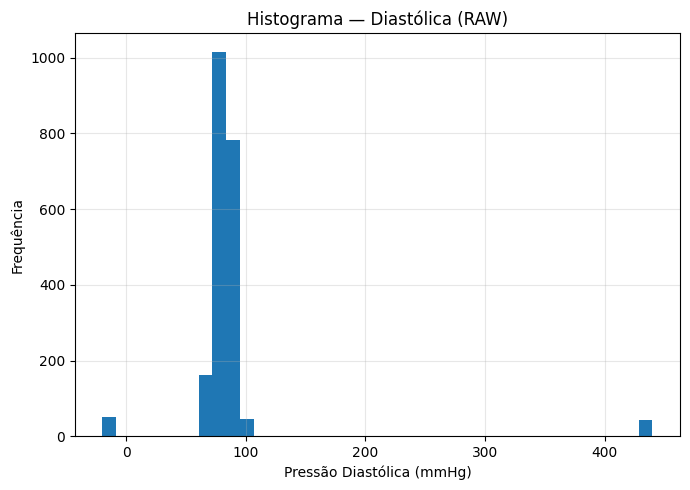

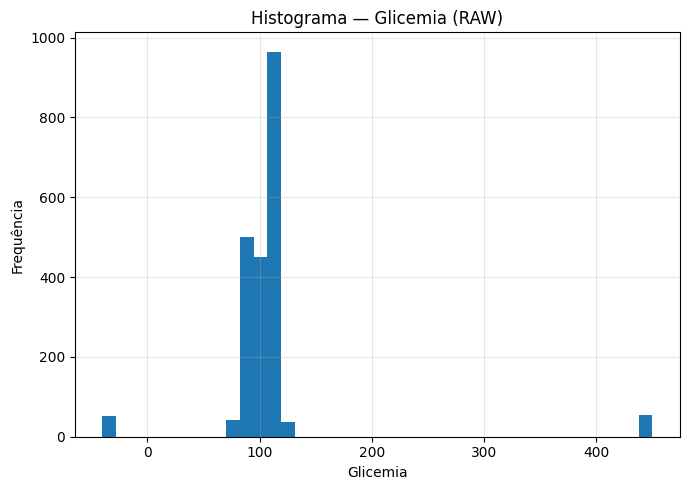

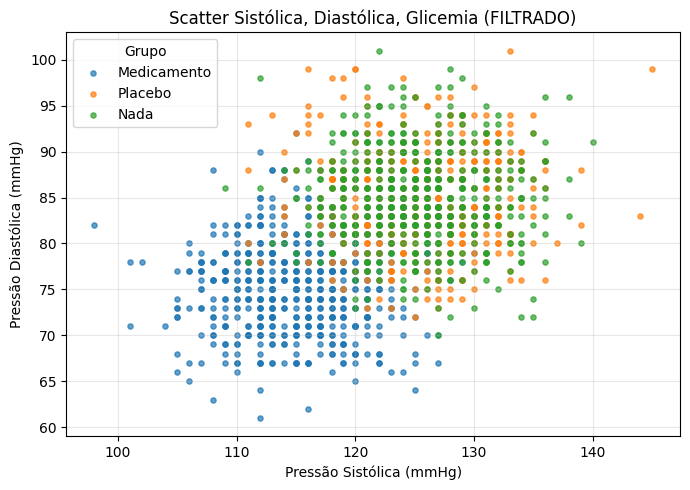

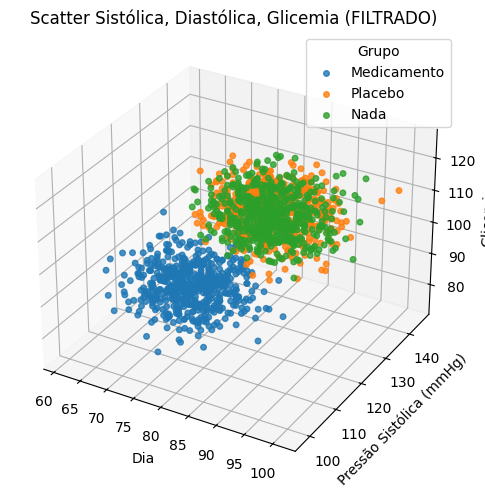

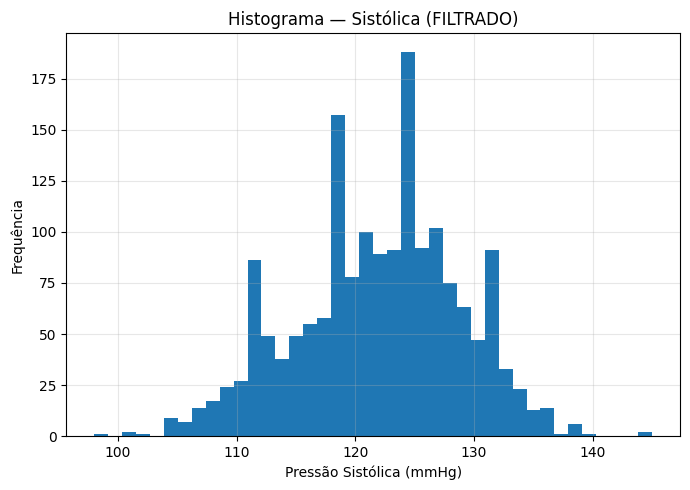

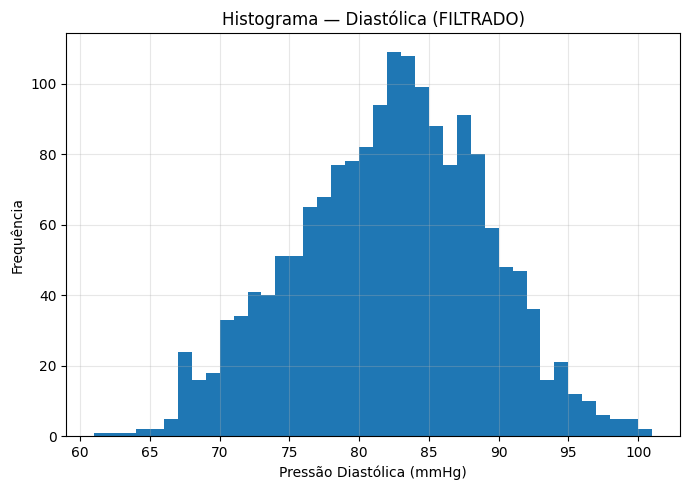

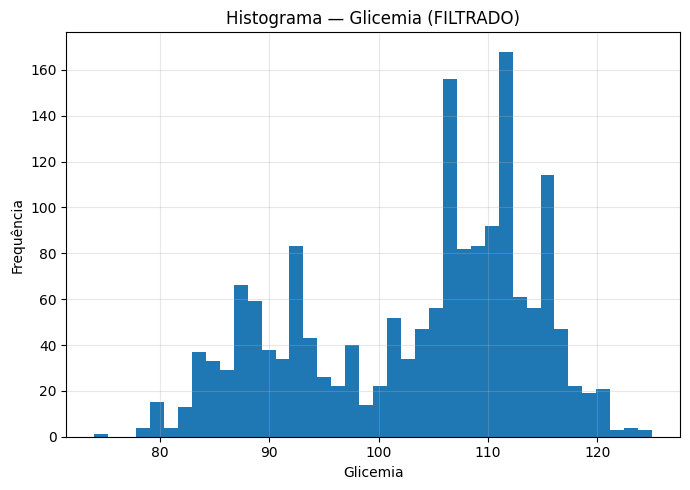

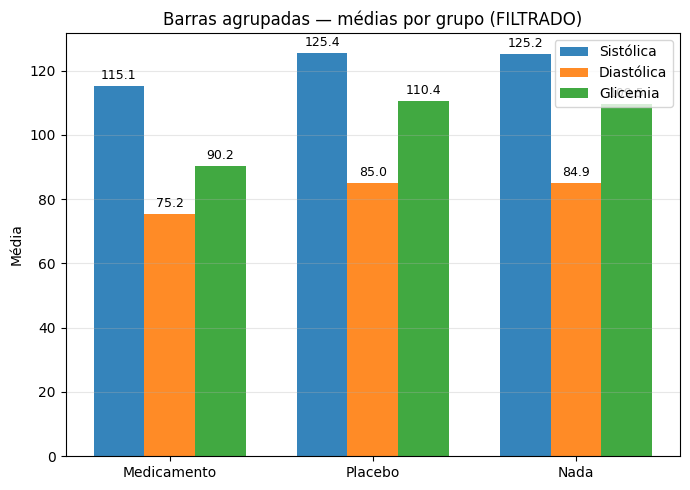

In [21]:
import matplotlib.pyplot as plt
import pandas as pd
import io
import numpy as np
from google.colab import files
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
import matplotlib.cm as cm
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.lines import Line2D

RAW_URL = "https://raw.githubusercontent.com/rmcesarjr/iccd/main/data/dados_pressao_local.csv"
#RAW_URL = None  # util para ler do proprio hd local

VERBOSE = False

def carrega_dados():
    if RAW_URL:
        df = pd.read_csv(RAW_URL)
    else:
        uploaded = files.upload()
        nome = next(iter(uploaded))
        df = pd.read_csv(io.BytesIO(uploaded[nome]))

    return df

def figure_size():
  return((7, 5))

def cria_df(ids, datas, sistolica, diastolica, glicemia, grupos):
    df = pd.DataFrame({
        "ID_paciente": ids,
        "Data": datas,
        "Sistolica": pd.to_numeric(sistolica, errors="coerce"),
        "Diastolica": pd.to_numeric(diastolica, errors="coerce"),
        "Glicemia": pd.to_numeric(glicemia, errors="coerce"),
        "Grupo": grupos,
    }).dropna(subset=["Sistolica", "Diastolica", "Glicemia", "Grupo"])

    return(df)


def visualiza_dados(df, titulo="Scatter Sistólica vs Diastólica por grupo (cor = Glicemia)"):
    plt.figure(figsize=figure_size())
    for grupo in ["Medicamento", "Placebo", "Nada"]:
        sub = df[df["Grupo"] == grupo]
        plt.scatter(sub["Sistolica"], sub["Diastolica"], s=14, alpha=0.7, label=grupo)
    plt.xlabel("Pressão Sistólica (mmHg)")
    plt.ylabel("Pressão Diastólica (mmHg)")
    plt.title(titulo)
    plt.grid(True, alpha=0.3)
    plt.legend(title="Grupo")
    plt.tight_layout()
    plt.show()

    fig = plt.figure(figsize=figure_size())
    ax = fig.add_subplot(111, projection="3d")

    for grupo in ["Medicamento", "Placebo", "Nada"]:
        sub = df[df["Grupo"] == grupo]
        ax.scatter(sub["Diastolica"], sub["Sistolica"], sub["Glicemia"], s=16, alpha=0.8, label=grupo)

    ax.set_xlabel("Dia")
    ax.set_ylabel("Pressão Sistólica (mmHg)")
    ax.set_zlabel("Glicemia")
    ax.set_title(titulo)
    ax.legend(title="Grupo")
    plt.tight_layout()
    plt.show()


def histogramas(df, sufixo_titulo="RAW"):
    # Histograma Sistólica
    plt.figure(figsize=figure_size())
    plt.hist(df["Sistolica"].dropna(), bins=40)
    plt.xlabel("Pressão Sistólica (mmHg)")
    plt.ylabel("Frequência")
    plt.title(f"Histograma — Sistólica ({sufixo_titulo})")
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()
    # Histograma Diastólica
    plt.figure(figsize=figure_size())
    plt.hist(df["Diastolica"].dropna(), bins=40)
    plt.xlabel("Pressão Diastólica (mmHg)")
    plt.ylabel("Frequência")
    plt.title(f"Histograma — Diastólica ({sufixo_titulo})")
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()
    # Histograma Glicemia
    plt.figure(figsize=figure_size())
    plt.hist(df["Glicemia"].dropna(), bins=40)
    plt.xlabel("Glicemia")
    plt.ylabel("Frequência")
    plt.title(f"Histograma — Glicemia ({sufixo_titulo})")
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

def anota(bar_container):
    for rect in bar_container:
        h = rect.get_height()
        plt.annotate(f"{h:.1f}",
                      xy=(rect.get_x() + rect.get_width()/2, h),
                      xytext=(0, 3), textcoords="offset points",
                      ha="center", va="bottom", fontsize=9)

def barras_agrupadas(df, sufixo_titulo="RAW"):
    sis = df["Sistolica"].astype(float)
    dia = df["Diastolica"].astype(float)
    gli = df["Glicemia"].astype(float)

    ordem_pref = ["Medicamento", "Placebo", "Nada"]
    presentes = df["Grupo"].dropna().unique().tolist()
    grupos = [g for g in ordem_pref if g in presentes] + [g for g in presentes if g not in ordem_pref]

    medias_sis = [df.loc[df["Grupo"] == g, "Sistolica"].mean() for g in grupos]
    medias_dia = [df.loc[df["Grupo"] == g, "Diastolica"].mean() for g in grupos]
    medias_gli = [df.loc[df["Grupo"] == g, "Glicemia"].mean()  for g in grupos]

    x = np.arange(len(grupos))
    w = 0.25

    plt.figure(figsize=figure_size())
    b1 = plt.bar(x - w, medias_sis, width=w, label="Sistólica", alpha=0.9)
    b2 = plt.bar(x,      medias_dia, width=w, label="Diastólica", alpha=0.9)
    b3 = plt.bar(x + w, medias_gli, width=w, label="Glicemia",  alpha=0.9)

    plt.xticks(x, grupos)
    plt.ylabel("Média")
    plt.title(f"Barras agrupadas — médias por grupo ({sufixo_titulo})")
    plt.grid(True, axis="y", alpha=0.3)
    plt.legend()

    anota(b1); anota(b2); anota(b3)
    plt.tight_layout()
    plt.show()


def criterios_qualidade(data_str, sis, dia, gli, ano_valido=2021):
  dia_min = 30
  dia_max = 220
  sis_min = 50
  sis_max = 300
  gli_min = 60
  gli_max = 200

  s = str(data_str).strip()
  partes = s.split("/")
  dd_s, mm_s, aa_s = partes
  dd = int(dd_s)
  mm = int(mm_s)
  aa = int(aa_s)

  if not (1 <= dd <= 31):
      return False, "Dia fora de [1,31]"
  if not (1 <= mm <= 12):
      return False, "Mês fora de [1,12]"
  if aa != ano_valido:
      return False, f"Ano != {ano_valido}"
  if not (sis_min <= sis <= sis_max):
      return False, f"Nao verificado {sis_min} ≤ Sistólica ≤ {sis_max}"
  if not (dia_min <= dia <= dia_max):
      return False, f"Nao verificado {dia_min} ≤ Diastólica ≤ {dia_max}"
  if not (gli_min <= gli <= gli_max):
      return False, f"Nao verificado {gli_min} ≤ Glicemia ≤ {gli_max}"

  return True, None

def controle_qualidade(df, max_preview=10):
    ids    = df["ID_paciente"].tolist()
    datas  = df["Data"].tolist()
    sistolica   = df["Sistolica"].tolist()
    diastolica   = df["Diastolica"].tolist()
    glicemia   = df["Glicemia"].tolist()
    grupos = df["Grupo"].tolist()

    n = len(ids)
    ids_ok, datas_ok, sist_ok, dia_ok, gli_ok, grupos_ok = [], [], [], [], [], []
    n_bad = 0

    print("=== CONTROLE DE QUALIDADE (data) ===")

    for i in range(n):
        idp   = ids[i]
        data = datas[i]
        sis   = sistolica[i]
        dia   = diastolica[i]
        gli   = glicemia[i]
        grp   = grupos[i]

        ok, motivo = criterios_qualidade(data, sis, dia, gli)
        if ok:
            ids_ok.append(idp)
            datas_ok.append(data)
            sist_ok.append(sis)
            dia_ok.append(dia)
            gli_ok.append(gli)
            grupos_ok.append(grp)
        else:
            if VERBOSE: print(f"Data invalida excluida da amostra: paciente {idp} motivo {motivo}")
            n_bad+=1

    print(f"Total de amostras: {n}")
    print(f"Removidas: {n_bad}  ({(n_bad/n*100):.2f}%)")

    return cria_df(ids_ok, datas_ok, sist_ok, dia_ok, gli_ok, grupos_ok)

def separador():
  print("\n")
  print("==================")
  print("\n")


def tabela_sumaria(df):
    df["Sistolica"] = pd.to_numeric(df["Sistolica"], errors="coerce")
    df["Diastolica"] = pd.to_numeric(df["Diastolica"], errors="coerce")
    df["Glicemia"]  = pd.to_numeric(df["Glicemia"],  errors="coerce")

    pacientes = df.groupby("Grupo")["ID_paciente"].nunique().to_frame("#Pacientes")

    resumo = (
        df.groupby("Grupo")[["Sistolica", "Diastolica", "Glicemia"]]
          .agg(["count", "mean", "min", "max"])
          .round(1)
    )

    tabela = pd.concat([pacientes, resumo], axis=1)

    separador()
    print("Resumo estatístico por grupo (inclui #Pacientes distintos):")
    display(tabela)


def main():
  #data_loader
  df = carrega_dados()

  # Manipulacao de dados: Controle de Qualidade
  df_ok = controle_qualidade(df)

  # analise inicial: tabela sumaria de dados
  tabela_sumaria(df)
  tabela_sumaria(df_ok)

  # Visualização e histogramas RAW
  visualiza_dados(df, titulo="Scatter Sistólica, Diastólica, Glicemia (RAW)")
  histogramas(df, sufixo_titulo="RAW")

  # Visualização e histogramas pós-filtragem
  visualiza_dados(df_ok, titulo="Scatter Sistólica, Diastólica, Glicemia (FILTRADO)")
  histogramas(df_ok, sufixo_titulo="FILTRADO")

  barras_agrupadas(df_ok, sufixo_titulo="FILTRADO")

main()


## Simulação dos dados

In [1]:
import csv
import os
import random
from datetime import date, timedelta
from google.colab import files

# ----------------------------------------
# Funções auxiliares internas
# ----------------------------------------

def _datas_consecutivas_2021(qtd_dias):
    """Gera uma sequência de datas consecutivas em 2021 no formato dd/mm/aaaa."""
    primeiro = date(2021, 1, 1)
    ultimo = date(2021, 12, 31)
    janela = (ultimo - primeiro).days + 1
    max_start = janela - qtd_dias
    if max_start < 0:
        raise ValueError("qtd_dias maior que o número de dias de 2021.")
    start_off = random.randint(0, max_start)
    inicio = primeiro + timedelta(days=start_off)
    return [(inicio + timedelta(days=k)).strftime("%d/%m/%Y") for k in range(qtd_dias)]

def _amostra_normal_int(mu, sigma):
    """Retorna um inteiro amostrado de N(mu, sigma)."""
    return int(round(random.gauss(mu, sigma)))

def _injeta_outlier(valor, prob, baixo, alto):
    if random.random() < prob:
      return random.choice([baixo,alto])
    else: return valor

def _injeta_outlier_data(valor, prob):
    if random.random() < prob:
      dia, mes, ano = valor.split("/")
      novo_ano = "2201"
      druido = f"{dia}/{mes}/{novo_ano}"
      return druido
    else: return valor


# ----------------------------------------
# Função principal de simulação
# ----------------------------------------

def simular_dados_pressao(
    pacientes_por_grupo,
    dias_por_paciente=7,
    medias_sis = {"Placebo": 125, "Medicamento": 115, "Nada": 120},
    medias_dia = {"Placebo":  85, "Medicamento":  75, "Nada":  80},
    medias_gli = {"Placebo": 110, "Medicamento": 100, "Nada": 105},
    sigma_sis=10, sigma_dia=8, sigma_gli=15,
    prob_outlier_bp=0.05,
    outlier_sis_baixo=-40, outlier_sis_alto=620,
    outlier_dia_baixo=-20, outlier_dia_alto=440,
    prob_outlier_gli=0.05,
    outlier_gli_baixo=-40, outlier_gli_alto=450,
    csv_path="dados_pressao_sinteticos.csv"
):

    ids, datas, sistolica, diastolica, grupos, glicemia = [], [], [], [], [], []

    prox_id = 1
    for grupo, n_pac in pacientes_por_grupo.items():
        mu_s = medias_sis.get(grupo, 120)
        mu_d = medias_dia.get(grupo, 80)
        mu_g = medias_gli.get(grupo, 105)

        for _ in range(n_pac):
            datas_p = _datas_consecutivas_2021(dias_por_paciente)
            for d in datas_p:
                s = _amostra_normal_int(mu_s, sigma_sis)
                dpress = _amostra_normal_int(mu_d, sigma_dia)
                g = _amostra_normal_int(mu_g, sigma_gli)

                dt_final = _injeta_outlier_data(d, prob_outlier_bp)

                s = _injeta_outlier(s, prob_outlier_bp, baixo=outlier_sis_baixo, alto=outlier_sis_alto)
                dpress = _injeta_outlier(dpress, prob_outlier_bp, baixo=outlier_dia_baixo, alto=outlier_dia_alto)
                g = _injeta_outlier(g, prob_outlier_gli, baixo=outlier_gli_baixo, alto=outlier_gli_alto)

                ids.append(prox_id)
                datas.append(dt_final)
                sistolica.append(s)
                diastolica.append(dpress)
                grupos.append(grupo)
                glicemia.append(g)
            prox_id += 1

    caminho_absoluto = os.path.abspath(os.path.expanduser(csv_path))
    with open(caminho_absoluto, "w", newline="", encoding="utf-8") as f:
        w = csv.writer(f)
        w.writerow(["ID_paciente","Data","Sistolica","Diastolica","Glicemia","Grupo"])
        for i in range(len(ids)):
            w.writerow([ids[i], datas[i], sistolica[i], diastolica[i], glicemia[i], grupos[i]])
    files.download(caminho_absoluto)

    print(f"Arquivo CSV salvo em: {os.path.abspath(caminho_absoluto)}")
    return ids, datas, sistolica, diastolica, grupos, glicemia, caminho_absoluto

def main():

  tamanho_grupos = 100

  ids, datas, sistolica, diastolica, grupos, glicemia, csv_path = simular_dados_pressao(
      pacientes_por_grupo={"Placebo": tamanho_grupos, "Medicamento": tamanho_grupos, "Nada": tamanho_grupos},
      dias_por_paciente=7,
      medias_sis={"Placebo":125, "Medicamento":115, "Nada":125},
      medias_dia={"Placebo":85, "Medicamento":75, "Nada":85},
      medias_gli={"Placebo":110, "Medicamento":90, "Nada":110},
      sigma_sis=5, sigma_dia=5, sigma_gli=5,
      csv_path="dados_pressao_local.csv"
)

main()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Arquivo CSV salvo em: /content/dados_pressao_local.csv
